# Introdução

Neste projeto será utilizada a base de dados fornecida pelo Hospital Sírio Libanês. Ela esta disponível no site do [Kaggle](https://www.kaggle.com/) na pagina do grupo do Sírio Libanês [COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19).

Essa base de dados contém informações, não sensíveis, que diz respeito a quantidade de pacientes que foram ou não internados por covid-19 na clínica do hospital durante a pandemia de corona virus. A pandemia de COVID-19 atingiu o mundo inteiro, sobrecarregando os sistemas de saúde - despreparados para uma solicitação tão intensa e demorada de leitos de UTI, profissionais, equipamentos de proteção individual e recursos de saúde. O Brasil registrou o primeiro caso COVID-19 em 26 de fevereiro e atingiu a transmissão na comunidade em 20 de março. 

## O problema 

Apesar do virus não ter uma letalidade tão alta a disseminação dele é relativamente alta para os vírus respiratórios e ao infectar muitas pessoas, uma parcela delas precisará de assistência médica. Portanto, como a quantidade de pessoas que necessitam de assitência é extremamente alta ocorre o pressionamento do sistema de saúde.

Há urgência na obtenção de dados precisos para melhor prever e preparar os sistemas de saúde e evitar colapsos, definido pela necessidade de leitos de UTI acima da capacidade, usando dados clínicos individuais - em vez de dados epidemiológicos e populacionais.

O colapso do sistema de saúde ocorre quando toda a estrutura não comporta a quantidade de atendimentos de qualquer natureza devido a alta demanda dos serviços de saúde. Nesta situação não basta só ter equipes médicas, de enfermagem e outros técnicos, pois a estrutura não comporta.

<img src='https://img.medscape.com/thumbnail_library/cdc_200313_flatten_the_curve_800x450.jpg'>


## Objetivos 

Ilutrado os problemas acima, podemos definir como objetivos as seguintes tarefas.

1. Prever a admissão na UTI de *casos confirmados* de COVID-19. Com base nos dados disponíveis, é viável prever quais pacientes precisarão de suporte em unidade de terapia intensiva?

O objetivo é fornecer aos hospitais terciários e trimestrais a resposta mais precisa, de modo que os recursos da UTI possam ser arranjados ou a transferência do paciente agendada.

2. Prever NÃO admissão à UTI de *casos COVID-19 confirmados*. Com base na subamostra de dados amplamente disponíveis, é viável prever quais pacientes precisarão de suporte de unidade de terapia intensiva?

O objetivo é fornecer aos hospitais locais e temporários uma resposta boa o suficiente, para que os médicos de linha de frente possam dar alta com segurança e acompanhar remotamente esses pacientes. 

## O Conceito de Janela 

Na pagina do Kaggle é ilustrado o conceito de janela. Em uma janela existe dados agrupados de um paciente, que consiste em: 

**Paciente**: 
 - Visita do Paciente
 - Agregada por janelas em ordem cronológica


|Janela|Descrição|
---|---
0-2|de 0 a 2 horas da admissão no hospital
2-4|de 2 a 4 horas da admissão no hospital
4-6|de 4 a 6 horas da admissão no hospital
6-12|de 6 a 12 horas da admissão no hospital
Acima-12|Acima de 12 horas da admissão no hospital

**OBS:** *Cuidado para NÃO usar os dados quando o paciente já estiver na UTI, pois a ordem do evento é desconhecida (talvez o evento "coleta de informação" tenha acontecido antes ou depois do paciente se encontrar na unidade). Eles foram mantidos para que no futuro possam aumentar este conjunto de dados em outros resultados posteriormente.*

**Ilustração de como funciona uma janela de informações**:
<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media'>

> Acima temos um paciente que deu entrada no sistema e só foi para a UTI na janela acima de 12h.

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media'>

> Acima temos um paciente que foi para a UTI na janela de 2h. 

Note que até o paciente ir para a UTI podemos utilizar os registros informados na base de dados, entrentanto se o paciente foi para UTI, as informações não podem ser usadas, pois não sabemos se ela foi feita antes do paciente ir para unidade ou depois. Então nesta situação as informações não tem poder preditivo.

## Os dados 

Este conjunto de dados contém dados anônimos do Hospital Sírio-Libanês, de São Paulo e de Brasília. Todos os dados foram tornados anônimos seguindo as melhores práticas e recomendações internacionais.

Os dados foram limpos e escalados por coluna de acordo com Min Max Scaler para caber entre -1 e 1. 

### A respeito da importância da anonimização dos dados

A Lei Geral de Proteção de Dados Pessoais (LGPD), Lei nº 13.709, de 14 de agosto de 2018, dispõe sobre o tratamento de dados pessoais, inclusive nos meios digitais, por pessoa natural ou por pessoa jurídica de direito público ou privado, com o objetivo de proteger os direitos fundamentais de liberdade e de privacidade e o livre desenvolvimento da personalidade da pessoa natural. 

Tendo em vista a vigência dessa Lei, de suma importancia pra sociedade, é importante que os dados sejam anonimizados para respeitar os direitos dos cidadãos brasileiros. É importante citar isso pois anonimização de um dado deve ser muito bem feita afim de não violar o direito dos individuos.

Note que só o fato de sabermos que a mostra foi retirada dentre os pacientes do Hospital Sírio Libanês em um intervalo X de tempo já reduz muito o fator de anonimidade do dado e se uma variável fosse explicitamente a comorbidade "diabetes", "pressão alta" ou "HIV", caso as variáveis não fossem *clusterizadas*, sabendo a prevalência de uma doença numa população é possível encontrar as características de cada amostra e é importante dificultar este tipo de análise para estar de acordo com a lei de proteção de dados.

Uma forma de anonimizar esses dados é criar grupos de características entre as amostras evitando assim de informar exatamente quais são as características de um elemento da base de dados. 

fonte: [Lei Geral de Proteção de Dados - LGPD](https://www.planalto.gov.br/ccivil_03/_Ato2015-2018/2018/Lei/L13709.htm#ementa)


### Dados Disponíveis

|Grupo de dados| quantidade de informações|
|---|---|
|Informação demográfica| 3 |
|Doenças pré-existentes| 9 |
|Resultados do exame de sangue| 36 |
|Sinais vitais | 6 |

No total, temos 54 variáveis, expandidas quando *pertinente* para a **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**

**Dicas**

* **Dados Faltantes:**

    **Problema:** um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia nas suas diferentes medidas. Por exemplo, sinais vitais são medidos com mais frequencia (normalmente de hora em hora) do que os exames de sangue (diários).

    **Sugestão:** é razoável presumir que um paciente que não tem uma medida registrada em uma janela de tempo está clinicamente estável, apresentando  sinais vitais e exames de sangue similares aos das janelas vizinhas. Portanto, se pode preencher os dados faltantes usando os dados da janela anterior ou posterior. Atenção para a multicolinearidade e casos de variância 0 nestes dados quando for escolher seu algoritmo.

* **Quanto antes, melhor!**

    **Problema:** A identificação precoce destes pacientes que vão desenvolver um caso adverso da doença (e precisarão de cuidado intensivo) é chave para um tratamento apropriado (salvando vidas) e para administrar os leitos e recursos.

    **Sugestão:** Enquanto um modelo preditivo que use todas as janelas de tempo vai provavelmente conseguir uma acurácia melhor, um bom modelo usando apenas a primeira janela (de 0 a 2 horas) é provavelmente mais clinicamente relevante. A criatividade é, no entanto, muito bem vinda, portanto sinta-se livre com a engenharia de variáveis e janelas de tempo. Atenção para medições repetidas nos indivíduos, uma vez  que estes valores estão altamente correlacionados quando explorarmos os dados.

**Reconhecimento**
A Sociedade Beneficiente de Senhoras Sírio-Libanês está comprometida com a ciência e a filantropia para que os casos tenham o melhor tratamento de saúde possível para aqueles que dele necessitam. Nós gostaríamos de agradecer especialmente nosso departamento jurídico, nosso Instituto de Pesquisa e Educação e o Squad de Arquitetura e Inteligência de dados Clínicos e Radiológicos.

## Critérios de avaliação do projeto 

Existem duas perspectivas que serão analisadas na aprovação do projeto exigidas pela Alura: 

* Técnico
* Prático


### Critério técnico

#### Escopo do Projeto

Delimitar qual será o escopo do seu projeto e colocá-lo, de fato, em prática pode ser bastante desafiador pois é um equilíbrio entre a criatividade/entusiasmo e o tempo.

Por isso, começar, desenvolver e finalizar todas as frentes abertas em um estudo é valioso.Você, cientista, precisa mais uma vez, ponderar: explorar pouco as possibilidades e ter um estudo raso ou explorar muitas possibilidades e não ser capaz de fechar dentro do elemento limitador, o tempo.

#### Estrutura do projeto

É necessário que seu estudo seja bem organizado e estruturado, apresentando uma sequência lógica da análise.

O projeto precisa expressar e justificar qual a linha de raciocínio foi criada e seguida durante o processo de elaboração.

#### Storytelling e conclusões

Parte da entrega de um estudo, é mostrar para a comunidade qual o seu valor, ou seja, contextualizar e trazer o interlocutor para o mesmo ponto de partida é vital.

É imprescindível que você pense que seu interlocutor, muitas vezes, não sabe do que aquele estudo se trata e/ou nem tem familiaridade com tecnologia e programação. Por isso, o notebook precisa ser explicativo de forma que a informação seja acessível para todos.

As conclusões parciais e a conclusão final são ótimos artifícios para que a informação você extraiu dos dados, seja mais facilmente entregue ao leitor (lembre-se: resultados podem ser inconclusivos, também).

Lembrete: este projeto será apresentado, de maneira fictícia, para o gerente responsável pela modelagem de dados do time de Data Science do Hospital Sírio Libanês. Você precisará persuadi-lo de que seu modelo tem os pontos necessários para entrar em produção e ajudará a antever e evitar qualquer ruptura.

#### Boas práticas de programação

Parte essencial de Data Science é a construção de código fundamentada nas boas práticas de programação.

Uma boa documentação do código, nomes significativos para as variáveis, a reutilização de funções, podem ser exemplos de como colocar esse conceito em prática.

Por isso, durante a correção, será dada uma atenção especial a esse cuidado que deve ser dado ao notebook.

#### Gráficos e Tabelas

A organização dos dados em gráficos e/ou tabelas é fundamental para a construção de uma boa visualização dos dados, ou seja, precisamos entender como eles estão distribuídos e se comportam ao longo do tempo.

Por isso, gráficos ou tabelas completos e viáveis são indispensáveis (ex: título explicativo, labels nomeadas. No caso específico de gráficos: escala ajustada, início em (0, 0) ou caso não aconteça, apresente justificativa, por exemplo).

#### Pesquisas externas e cruzamento de dados

Do ponto de vista do estudo, é muito enriquecedor que outras fontes de informações sejam usadas para agregar valor e corroborar na construção da argumentação do projeto. E do ponto de vista técnico, isso mostra adaptabilidade e pensamento sempre um passo à frente, isso porque o cruzamento de dados é um passo muito importante no seu amadurecimento enquanto Data Scientist.

Porém, é preciso tomar bastante cuidado ao fazer essa junção: será avaliado o valor agregado à pesquisa, não somente o cruzamento em si.

*Dica: os dados do DataSUS podem ser uma boa fonte de inspiração para os cruzamentos. Além disso, você pode expandir suas análises feitas durante os projetos do módulo 01 e módulo 04, visto que, a partir das nossas conclusões, conseguimos justificar a implantação de um modelo que visa monitorar a evolução do quadro pandêmico no Brasil que apresenta alta nos casos.*

### Critério prático

* Os critérios mínimos práticos são bastante objetivos e claros, cientista. Use como um lembrete sobre o conteúdo que deve produzir.

* Os dados estão dentro do escopo? (É obrigatório o uso da base de dados da Covid-19, disponibilizada pelo Hospital Sírio Libanês - São Paulo e Brasília, no Kaggle)

* Ao rodar o notebook, ele apresenta erros? (Warnings serão desconsiderados)

* Quando necessário, as variáveis foram tratadas?

* Se houve criação de variáveis, as mesmas foram descritas?

* Ficou claro qual foi o modelo final escolhido e o que motivou a escolha?

* Quais testes foram aplicados? Foi justificado?

* O modelo foi testado e validado adequadamente?

* O notebook tem uma narrativa convincente e coerente?

* O projeto contém meios para visualizar dados (gráficos ou tabelas) que ajudam na argumentação dos pontos principais do cientista?

* A bibliografia e fontes de dados alternativas foram citadas?

---



# Importações e definições

Aqui estão todos módulos python que vou utilizar neste trabalho, bem como as funções criadas para exibições. 

## Importações

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

from matplotlib import pyplot as plt 
from statsmodels import api as sm 
from statsmodels import stats as ss

from sklearn.preprocessing import LabelEncoder

### Base de dados

In [2]:
sirio_libanes = pd.read_excel('https://github.com/ConradBitt/BootCamp_DataScience/blob/master/ML%20em%20Saude/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')

## Definições 

Esta etapa pode não seguir a ordem cronológica do relatório, pos aqui ficam os códigos para evitar que tenha várias funções complexas ao longo da análise. Contruindo funções aqui facilita analisar apenas os outputs de cada função.

In [3]:
#np.random.randint(0,2**32) # semente gerada: 3340758118
seed = 3340758118

# ===================================== Análise exploratória ======================
# Estatisticas descritivas dos dados 

## Muda identificador 
def muda_identificador(dados):
    """
    Muda o index para o identificador PATIENT_VISIT_IDENTIFIER
    """
    dados_novo_id = dados.set_index('PATIENT_VISIT_IDENTIFIER')
    return dados_novo_id

## Listas de variáveis das estatsiticas fornecidas pelo Sírio Libanês
def variaveis_com_media_mediana_max_min_diff_diffRel(dados):
    """
    Retorna as colunas com as variaveis cuja as informações contém estatisticas
    descritivas. Basicamente as colunas que tem rótulos do tipo '_MEAN','_DIFF'...
    """
    media, mediana, maximo, minimo, diff, diff_rel, cat = [],[],[],[],[],[], []
    for coluna in dados.columns:
        if '_MEAN' in coluna: 
            media.append(coluna)
        elif '_MEDIAN' in coluna: 
            mediana.append(coluna)
        elif '_MAX' in coluna: 
            maximo.append(coluna)
        elif '_MIN' in coluna: 
            minimo.append(coluna)
        elif '_DIFF' in coluna and '_REL' not in coluna: 
            diff.append(coluna)
        elif '_REL' in coluna:
            diff_rel.append(coluna)
        else:
            cat.append(coluna)
                
            
    return media, mediana, maximo, minimo, diff, diff_rel, cat
        
# Describe do statsmodels 
def descricoes_pandas_statsmodels(dados):
    """
    Retorna uma tupla com estatisticas descritivas
    usando o pandas e o statsmodels.
    """
    descricoes_stats_models = ss.descriptivestats.Description(dados)
    descricoes_pandas = dados.describe()
    return descricoes_pandas, descricoes_stats_models

def exibe_mapa_correlaçao(dados, title='', cmap='cool', figsize=(20,12), annot=False):
    """
    Exibe um mapa de correlação.
    """
    corr = dados.corr()
    plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, cmap=cmap, annot=annot, fmt='.2f')
    ax.set_title(title, fontsize=20, pad=20)
    return ax

# ===================================== Pré processamento ======================

def categorico_para_quantitativo(dados, variavel_categorica):
    """
    Muda os dados quantiativos para categoricos. 
    """
    le = LabelEncoder()
    le.fit(dados[variavel_categorica])
    dados[variavel_categorica] = le.fit_transform(dados[variavel_categorica]) / 10
    return dados


def interpolacao(grupo):
    return grupo.interpolate(method='linear', limit=1, limit_direction='both')


def preenche_nan(dados):
    """
    Esta função preenche os dados do tipo NaN.
    Primeiro ela agrupa os dados pelo identificador,
    Aplica uma interpolação linear entre os visinhos
    Aplica um preenchimento com o registro anterior
    Aplica um preenchimento com o registro posteior
    retorna o dataframe com os dados preenchidos.
    """
    
    # separação de features em categoricas continuas e os classificadores.
    features_categoricas = dados.iloc[:,:13]
    colunas_features_continuas = dados.iloc[:,13:-2].columns
    classificadores = dados.iloc[:,-2:]
    
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER')[colunas_features_continuas].apply(interpolacao).fillna(method='backfill').fillna(method='ffill')
    
    dado_preenchido = pd.concat([features_categoricas, features_continuas, classificadores], axis=1, ignore_index=False)
    dado_preenchido.columns = dados.columns
    return dado_preenchido


def foi_para_UTI(dado_agrupado : pd.DataFrame):
    """
    Esta função verifica quais pacientes foram pra UTI na janela.
    Se o paciente foi pra UTI na janela 2, então adiciona o valor 1
    na coluna ICU anterior e retorna todo o grupo até ela.
    """
    if np.any(dado_agrupado['ICU']):  # se o paciente foi em algum momento pra uti
        
        momento_foi_para_uti = len(dado_agrupado['ICU']) - dado_agrupado['ICU'].sum()  # momento em que foi para UTI
        
        for linha in range(len(dado_agrupado)):  # passar por todas as linhas
            if dado_agrupado.loc[:,'ICU'].iloc[linha] == 1:
                dado_agrupado.loc[:,'ICU'].iloc[linha - 1] = 1  # adicionar 1 na coluna ICU anterior
        
        if momento_foi_para_uti != 0:  #  se não foi na primeira janela
            # retorna o grupo até a janela em que ele foi para UTI
            return dado_agrupado.iloc[:momento_foi_para_uti, :]
        #else:
            # retorna o paciente que foi pra UTI na primeira janela
            # talvez esta linha abaixo possa ser desconsiderada
         #   return dado_agrupado.iloc[momento_foi_para_uti, :].to_frame().T   
    else:
        # retorna o paciente que não foi em nenhum momento para a UTI
        return dado_agrupado
    
def filtro_janelas_uteis(dado):
    """
    Filtra os registros pelas janelas úteis dos pacientes
    que foram para a UTI e também daqueles que não foram.
    """
    dado_filtrado = dado.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False).apply(foi_para_UTI)
    dado_filtrado = dado_filtrado.reset_index().set_index('PATIENT_VISIT_IDENTIFIER')
    return dado_filtrado


# Análise exploratória 


## Visualizando uma amostra

In [4]:
sirio_libanes.sample(10, random_state=seed)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1908,381,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,6-12,0
1548,309,0,40th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
404,80,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.523810,-0.898990,-0.44757,-0.110067,-0.476752,-0.677419,-0.526426,-0.902167,ABOVE_12,0
1891,378,0,10th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1663,332,1,80th,0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,0
402,80,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
955,191,0,20th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,NaN,-1.000000,-1.000000,0-2,0
592,118,0,20th,1,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1149,229,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.214286,-0.838384,-0.36087,-0.485092,-0.342203,-0.695341,-0.229191,-0.840206,ABOVE_12,0
950,190,1,60th,1,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0


## Visualização de variáveis:

In [5]:
sirio_libanes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    PATIENT_VISIT_IDENTIFIER          int64  
 1    AGE_ABOVE65                       int64  
 2    AGE_PERCENTIL                     object 
 3    GENDER                            int64  
 4    DISEASE GROUPING 1                float64
 5    DISEASE GROUPING 2                float64
 6    DISEASE GROUPING 3                float64
 7    DISEASE GROUPING 4                float64
 8    DISEASE GROUPING 5                float64
 9    DISEASE GROUPING 6                float64
 10   HTN                               float64
 11   IMMUNOCOMPROMISED                 float64
 12   OTHER                             float64
 13   ALBUMIN_MEDIAN                    float64
 14   ALBUMIN_MEAN                      float64
 15   ALBUMIN_MIN                       float64
 16   ALBUMIN_MAX           

### Comentário sobre análise das variáveis disponíveis 

> Verifica-se que tem um total de 1925 linhas com 231 variáveis. Entretanto como a variável `PATIENT_VISIT_IDENTIFIER` é uma variável identificadora, na realidade temos um total de 385 registros. de cada paciente com 230 variáveis.

In [6]:
sirio_libanes = muda_identificador(sirio_libanes)

> Dentre as variáveis, 255 são do tipo `float64`, 4 variáveis do tipo `int64` e 2 do tipo `object` que são do tipo string. 

> Outra informação que é relevante é a quantidade de variáveis do tipo **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**. Na pagina do Kaggle dizem que estas informações são pertinentes e por isso foram extraidas estas estatisticas. Foi criada listas com cada uma dessas colunas na parte de **Definições** do notebook para facilitar o trabalho com essas colunas específicas.

In [7]:
media, mediana, maximo, minimo, diff, diff_rel, categorias = variaveis_com_media_mediana_max_min_diff_diffRel(sirio_libanes)

> Além disso, outra variável importante é a `AGE_PERCENTIL`. Esta variável é do tipo `object`, que representa os percentis das idades que o paciente pertence. Por exemplo: 

* `AGE_PERCENTIL = 10th` idade de 0 até 10.

* `AGE_PERCENTIL = 20th` idade de 10 até 20.

*  `AGE_PERCENTIL = 30th` idade de 20 ...

* $....$

* `AGE_PERCENTIL = ABOVE 90th` idade de 90 até 100

> Por mais que seja uma variável categórica, ela é ordenável. Seŕa feita uma modificação nesta variável na parte de pré processamento.

## Estatisticas Descritivas: Statsmodels


In [8]:
descricoes_pandas, descricoes_stats_models = descricoes_pandas_statsmodels(sirio_libanes)

Vou utlizar as estatisticas descritivas do [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.Description.html#statsmodels.stats.descriptivestats.Description), apesar de que eu não vou comentar sobre todas elas acho relevante exibi-las tendo em vista que alguém pode se interessar por alguma estatsitica descritiva em específico. 

In [9]:
descricoes_stats_models.numeric.round(13)/5

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
nobs,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
missing,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,149.600000,138.800000,137.200000,137.000000,137.000000,137.000000,149.600000,138.800000,137.200000,0.000000
mean,0.093506,0.073766,0.021667,0.005625,0.019583,0.003958,0.025625,0.009375,0.042604,0.031667,...,-0.140737,-0.154068,-0.177439,-0.157399,-0.143190,-0.163560,-0.143829,-0.154265,-0.177396,0.053506
std_err,0.000052,0.000050,0.000032,0.000017,0.000031,0.000015,0.000035,0.000022,0.000043,0.000038,...,0.000082,0.000052,0.000048,0.000052,0.000068,0.000044,0.000076,0.000052,0.000048,0.000046
upper_ci,0.093608,0.073865,0.021730,0.005659,0.019644,0.003987,0.025693,0.009418,0.042688,0.031741,...,-0.140576,-0.153966,-0.177346,-0.157297,-0.143058,-0.163475,-0.143681,-0.154164,-0.177302,0.053597
lower_ci,0.093405,0.073668,0.021603,0.005591,0.019523,0.003930,0.025557,0.009332,0.042521,0.031592,...,-0.140897,-0.154169,-0.177533,-0.157502,-0.143323,-0.163645,-0.143978,-0.154367,-0.177490,0.053416
std,0.099815,0.096523,0.062176,0.033075,0.059456,0.027864,0.066863,0.042285,0.081910,0.073030,...,0.096419,0.063800,0.059229,0.064951,0.083821,0.054043,0.089320,0.063539,0.059354,0.088557
iqr,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070588,0.080952,0.024242,0.070904,0.095565,0.067494,0.073118,0.081065,0.023969,0.200000
iqr_normal,0.148260,0.148260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052327,0.060010,0.017971,0.052561,0.070842,0.050033,0.054203,0.060093,0.017768,0.148260
mad,0.099578,0.093118,0.038639,0.010934,0.035332,0.007760,0.044684,0.017871,0.067057,0.053306,...,0.071612,0.052243,0.027738,0.049445,0.065858,0.043024,0.067349,0.052054,0.027834,0.078384


### Comentário sobre estatisticas descritivas

> Os dados foram agrupados pelos identificadores e cada identificador tem 5 registros, logo ao utilizar a função que gera as estatisticas, se os 1920 registros forem utilizados estaremos contabilizando 5 resultados do mesmo indivíduo, por isso estou divindo o resultado por 5, ou seja, essas estatisticas são um panorama dos grupos, mas não representam fielmente a característica independente de cada um. Além disso os dados foram arredondados na 13º casa decimal.

> Como foi dito, algumas colunas não são numéricas, lógo não faz sentido extrair estatisticas descritivas delas por isso das 231 variaveis que tem a base de dados, apenas 228 foram utilizdas para a exibição.

> Podemos verificar que pra cada paciente tem em média um dado faltante na linha `missing`

> Um ponto interessante são as variáveis `DISEASE_GROUPING`, elas representam grupos de doenças, não sabemos exatamente quais são mas podemos verificar que dentre as 1920 informações a distribuição das médias de cada doença é diferente. Isso pode levar a seguinte hipótese "*Podemos supor que das 385 informações 2% tem  `DISEASE_GROUPING_1`*", **lembrando que as informações dos pacientes que foram para a UTI não tem relevancia preditiva devido ao anacronismo da coleta**, entretanto podemos utiliza-las para exibir informações de estatisticas descritivas.

### Descrição do pandas

Caso esteja habituado com as estatisticas descritivas do módulo do pandas, vou deixar o output aqui para consulta:

In [10]:
descricoes_pandas.round(13)/5

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,385.000000,385.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,235.400000,246.200000,247.800000,248.000000,248.000000,248.000000,235.400000,246.200000,247.800000,385.000000
mean,0.093506,0.073766,0.021667,0.005625,0.019583,0.003958,0.025625,0.009375,0.042604,0.031667,...,-0.140737,-0.154068,-0.177439,-0.157399,-0.143190,-0.163560,-0.143829,-0.154265,-0.177396,0.053506
std,0.099815,0.096523,0.062176,0.033075,0.059456,0.027864,0.066863,0.042285,0.081910,0.073030,...,0.096419,0.063800,0.059229,0.064951,0.083821,0.054043,0.089320,0.063539,0.059354,0.088557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.200000,-0.195238,-0.195960,-0.200000,-0.196989,-0.197964,-0.200000,-0.195185,-0.196067,0.000000
75%,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.129412,-0.119048,-0.175758,-0.129096,-0.104435,-0.132506,-0.126882,-0.118935,-0.176031,0.200000
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


## Correlação entre as variáveis 

Vimos que muitas variáveis estão expressas em termo das medidas: **média, mediana, máximo, mínimo, diff (Máximo - Mínimo)** e **diff relativa (diff/mediana)**. Tendo esta informação dada na introdução, foi foi criada uma função chamada `variaveis_com_media_mediana_max_min_diff_diffRel()` para separar estas variáveis. A motivação desta separação é porque em muitos casos se a variável `diff` foi obtida atraǘes da diferenciação da variável `mean` a correlação entre as duas será alta.

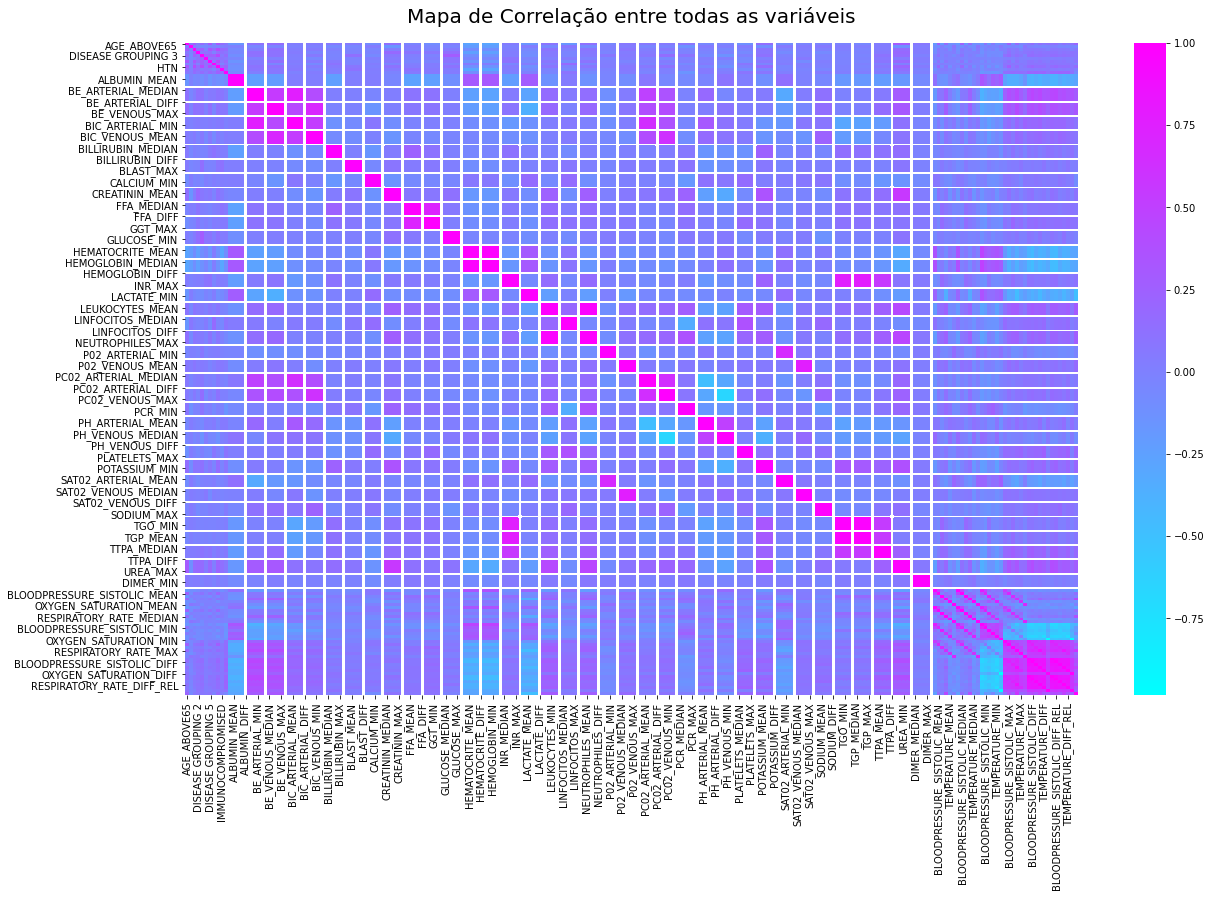

In [11]:
exibe_mapa_correlaçao(sirio_libanes,title='Mapa de Correlação entre todas as variáveis', annot=False);

### Comentário sobre o mapa de correlação

> Note que o mapa é literalmente uma matriz quadrada. Na diagonal principal temos correlação da variável com ela mesma, por isso a coloração rosa.

> Entretanto no canto inferior direito temos um grupo rosa, ou seja essas variáveis entre si estão altamente correlacionadas, a variável `BLOODPRESSURE` com sufixos `MAX`, `DIFF` e `RELL` estão altamente correlacionada, é provável uma variável foi construida dependendo da outra isso faz com que a correlação seja alta. O mesmo acontece no canto superior esquerdo, a variável `BE_ARTERIAL` com sufixos `MAX`, `DIFF` e `RELL`.

> Além dessas altas correlações esperadas das variáveis que representam diferentes estatisticas da mesma observação, temos por exemplo a coluna `INR_MEDIAN` com as linhas `TGO_MIN`, `TGP_MEAN` e `TTPA_MEDIAN` com uma correlação maior que 0.75.

> O que pode ser feito para contornar este fato de features autamente correlacionadas é filtrar a correlação entre cada uma delas a partir de um valor de corte.

# Pre processamento

Nesta etapa vou modificar algumas variáveis afim de facilitar análises futuras. 

## Tratando `AGE_PERCENTIL`

Como já foi dito anteriormente a variável `AGE_PERCENTIL` é uma variável do tipo `object`, entretanto se analisar os valores unicos dela é possível notar que são dados do tipo categóricos porem ordinais:

In [12]:
sirio_libanes.AGE_PERCENTIL.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

Tendo então as categorias vou utilizar uma função da biblioteca [Sci-Kit Learn] para fazer a transformação na variável, de um dado categórico para um dado quantitativo:

In [13]:
sirio_libanes = categorico_para_quantitativo(sirio_libanes, 'AGE_PERCENTIL')
sirio_libanes.AGE_PERCENTIL.unique()

array([0.5, 0.8, 0. , 0.3, 0.6, 0.1, 0.4, 0.7, 0.2, 0.9])

Desta forma a transformação que foi feita é:

| ANTES| DEPOIS|
|---|---|
|10th | 0 |
|20th | 0.1 |
|30th | 0.2 |
|40th | 0.3 |
|50th | 0.4 |
|60th | 0.5 |
|70th | 0.6 |
|80th | 0.7 |
|90th | 0.8 |
|Above 90th | 0.9 |

### Comentário sobre transformação do `AGE_PERCENTIL`

> A escolha deste tipo de transformação é deixar os dados dentro do padrão das variáveis da base de dados. A maioria delas esta normalizada, ou seja, dentro do intervalo $[-1,1]$. Poderia deixa-la no intervalo $[0,9]$ como sugere o própio `LabelEncoder` do sci-kit learn, mas não segui este caminho por pura liberdade.

## Tratando registros com `NaN`

Na etapa de estatisticas descritivas verificamos que em média, cada registro tem pelo menos 1 dado do tipo `missing`, digo isto baseado na descrição do statsmodels.

Para tratar os dados faltantes vou seguir a sugestão encontrada no site do Kaggle, que é preencher com o dado anterior ou com o anterior. Este preenchimento considera que num curto espaço de tempo a variação dos dados não é tão abrupta.

O processo de preenchimento sera o seguinte: 

1. Agrupar registros pelo index `PATIENT_VISIT_IDENTIFIER`.
2. Realizar uma interpolação linear caso falte um entre dois dados.
3. Preencher com o valor anterior.
4. Preencher com o valor posterior.
5. Petornar a base de dados com os dados preenchidos.

Ao agrupar os dados pelo index eu tenho garantia que cada alteração será feita em cada grupo, evitando que o paciente indice 5 seja afetado pelo numero 4 ou 6.

In [14]:
sirio_libanes = preenche_nan(sirio_libanes)

## Selecionando registros que podem ser usados para o modelo

Como já foi dito na introdução do problema, podemos utilizar os dados dos registros cujo *o paciente ainda não foi para UTI*. Esta condição é imposta ao descrever o conceito de janela. 

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2Fb1bc424df771a4d2d3b3088606d083e6%2FTimeline%20Example%20Best.png?generation=1594740856017996&alt=media' width=60%>

> Note na ilustração acima que não podemos usar a janela das 12h tendo em vista que o paciente foi para UTI neste momento. 

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media' width=60%>

> Outro ponto citado é que não podemos usar as janelas posteriores ao evento de ir para a UTI.

A filtragem das janelas úteis que eu vou fazer consiste em identificar **eliminar a janela cujo o paciente foi para a UTI**, além disso ou acidionar $1$ na coluna `ICU` da janela anterior. Veja o exemplo na imagem abaixo:

<img src='https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/projeto_final/preprocessamento_filtro_janela.png'>

> O paciente foi para a UTI na janela `ABOVE_12`, logo esta janela não pode ser utilizada, isso esta indicado no quadradinho vermelho. Portanto o que será feito é adicionar $1$ na coluna `ICU` da janela anterior (`6-12`) e utilizar todas essas janelas disponíveis como esta indicado no quadradinho verde.

> **OBS**: *Verifique abaixo do quadradinho vermelho, a janela `0-2` o `ICU` desta linha é 1, ou seja, este paciente foi para a UTI na primeira janela e segundo a condição informada no Kaggle esta janela não pode ser utilizada e nem as posteriores. O que o filtro faz nesta situação é remover este paciente da base de dados.*

In [16]:
sirio_libanes = filtro_janelas_uteis(sirio_libanes)